# Project: Communicate Data Findings Using Python
## by Song R.

## Preliminary Wrangling

> This document includes analysis about individual rides covering areas in the greater San Francisco Bay made in a bike-sharing system named 'Lyft'. The dataset can be found in Bay Wheels's trip data (renamed from Ford GoBike System Data). Only March 2020 data is used in this analysis.

In [1]:
# import all packages and set plots to be embedded inline:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [2]:
# import package to suppress warning messages:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read-in dataset:
bike_mar2020 = pd.read_csv('bike_trip_mar2020.csv')

In [4]:
# Overview of data shape and composition:
print(bike_mar2020.shape)
print(bike_mar2020.dtypes)
print(bike_mar2020.head())

(176799, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
rental_access_method        object
dtype: object
   duration_sec                start_time                  end_time  \
0         35187  2020-03-31 20:42:10.0790  2020-04-01 06:28:37.8440   
1         14568  2020-03-31 22:45:25.5010  2020-04-01 02:48:13.7730   
2         35990  2020-03-31 15:08:22.3310  2020-04-01 01:08:12.9900   
3          1068  2020-03-31 23:55:00.4260  2020-04-01 00:12:49.0200   
4          3300  2020-03-31 23:00:55.6410  2020-03-31 23:55:56.6110   

   start_station_id                             start_st

## Wrangling steps:

### Define data cleaning tasks:

1. Select only subset of bike_mar2020: keep only rows that do not contain NaNs in 'start_station_name', 'end_station_name' and 'rental_access_method' columns
2. Drop 2 unnecessary columns from the dataset: 'start_station_id' and 'end_station_id'
3. Edit data types in bike_clean as follow:
    - start_time and end_time should columns be datetime data type
    - bike_id column should be object (str) data type
4. Convert 'user_type' and 'rental_access_method' into unordered categorical types
5. Edit 16th Depot Bike Fleet Station's latitude and longitude to correct number: 37.523692 and -88.838091 respectively
6. Create 3 new columns: 
    - 'duration_min': 'duration_sec' divided by 60 to get duration time in minutes
    - 'start_hour': hour part in 'start_time' variable
    - 'start_period': period of the day in 'start_hour' variable

In [5]:
# Make a copy of bike_mar2020 before cleaning:
bike_clean = bike_mar2020.copy()

<b>1. Keep only rows that do not contain NaNs in 'start_station_name', 'end_station_name' and 'rental_access_method' </b>

In [6]:
bike_clean = bike_mar2020[(bike_mar2020['start_station_name'].notnull()) & 
                          (bike_mar2020['end_station_name'].notnull()) &
                          (bike_mar2020['rental_access_method'].notnull())]
bike_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
63542,1772,2020-03-31 15:23:58,2020-03-31 15:53:30,473.0,Willow St at Blewett Ave,37.309014,-121.900011,473.0,Willow St at Blewett Ave,37.309014,-121.900011,480691,Subscriber,app
63543,737,2020-03-26 16:24:05,2020-03-26 16:36:23,473.0,Willow St at Blewett Ave,37.309014,-121.900011,309.0,San Jose City Hall,37.337391,-121.886995,237580,Subscriber,app
63545,253,2020-03-15 18:51:36,2020-03-15 18:55:50,473.0,Willow St at Blewett Ave,37.309014,-121.900011,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,239732,Subscriber,app
63550,169,2020-03-31 15:20:10,2020-03-31 15:23:00,473.0,Willow St at Blewett Ave,37.309014,-121.900011,473.0,Willow St at Blewett Ave,37.309014,-121.900011,439978,Subscriber,app
63552,623,2020-03-07 18:31:26,2020-03-07 18:41:50,473.0,Willow St at Blewett Ave,37.309014,-121.900011,406.0,Parkmoor Ave at Race St,37.316736,-121.910005,168502,Subscriber,app
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174725,406,2020-03-15 16:47:10,2020-03-15 16:53:57,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,11.0,Davis St at Jackson St,37.797280,-122.398436,181768,Subscriber,clipper
174726,284,2020-03-11 16:49:16,2020-03-11 16:54:00,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,487.0,Powell St at Columbus Ave,37.800496,-122.410887,456827,Subscriber,app
174727,389,2020-03-06 13:30:22,2020-03-06 13:36:51,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,921888,Subscriber,app
174728,248,2020-03-03 10:13:41,2020-03-03 10:17:49,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,924766,Subscriber,app


<b>2. Drop 'start_station_id' and 'end_station_id' columns from bike_clean</b>

In [7]:
bike_clean.drop(columns = ['start_station_id', 'end_station_id'], axis = 1, inplace = True)

<b>3. Edit data types in bike_clean</b>

- Change start_time and end_time columns to datetime data type:

In [8]:
bike_clean.start_time = pd.to_datetime(bike_clean['start_time'])
bike_clean.end_time = pd.to_datetime(bike_clean['end_time'])

- Change start_station_id, end_station_id and bike_id columns to object (str) data type:

In [9]:
bike_clean.bike_id = bike_clean.bike_id.astype(str)

<b>4. Convert 'user_type' and 'rental_access_method' into unordered categorical types:</b>

In [10]:
# Change values in user_type into lower-case:
bike_clean['user_type'] = bike_clean['user_type'].str.lower()

# 4.1 Convert 'user_type' into unordered categorical type:
u_type = ['subscriber', 'customer']
u_cat = pd.api.types.CategoricalDtype(ordered = False, categories = u_type)
bike_clean['user_type'] = bike_clean['user_type'].astype(u_cat)

In [11]:
# 4.2 Convert 'rental_access_method' into unordered categorical type:
r_type = ['app', 'clipper']
r_cat = pd.api.types.CategoricalDtype(ordered = False, categories = r_type)
bike_clean['rental_access_method'] = bike_clean['rental_access_method'].astype(r_cat)

<b>5. Edit 16th Depot Bike Fleet Station's latitude and longitude to 37.523692 and -88.838091 respectively</b>

In [12]:
# 5.1 Change 16th Depot Bike Fleet Station's latitude to 37.523692 
bike_clean.end_station_latitude[bike_clean.end_station_name == '16th Depot Bike Fleet Station'] = 37.523692

In [13]:
# 5.2 Change 16th Depot Bike Fleet Station's longitude to -88.838091
bike_clean.end_station_longitude[bike_clean.end_station_name == '16th Depot Bike Fleet Station'] = -88.838091

<b>6. Create 3 new column: 'duration_min', 'start_hour' and 'start_period'</b>

In [14]:
# 6.1 Create 'duration_min': 'duration_sec' divided by 60 to get duration time in minutes:
bike_clean['duration_min'] = round(bike_clean['duration_sec'] / 60, 2)

# Drop 'duration_sec' from bike_clean df:
bike_clean.drop(columns = ['duration_sec'], axis = 1, inplace = True)

In [15]:
# 6.2 Create 'start_hour': hour part in 'start_time' variable:
bike_clean['start_hour'] = bike_clean['start_time'].apply(lambda time: time.hour)

In [16]:
# 6.3 Create 'start_period': period of the day in 'start_hour' variable:
bike_clean['period_day'] = 'morning'
bike_clean['period_day'][(bike_clean['start_hour'] >= 12) & (bike_clean['start_hour'] <= 17)] = 'afternoon'
bike_clean['period_day'][(bike_clean['start_hour'] >= 18) & (bike_clean['start_hour'] <= 23)] = 'night'

# Convert 'period_day' into ordered categorical type:
period_type = ['morning', 'afternoon', 'night']
period_cat = pd.api.types.CategoricalDtype(ordered = True, categories = period_type)
bike_clean['period_day'] = bike_clean['period_day'].astype(period_cat)

In [52]:
# Export bike_clean into 'bike_clean.csv' to use in part 2 (presentation):
bike_clean.to_csv('bike_clean.csv', index = False)

### Overview of cleaned data shape and composition:

In [17]:
print(bike_clean.shape)
print(bike_clean.dtypes)
print(bike_clean.head())

(30362, 14)
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
rental_access_method             category
duration_min                      float64
start_hour                          int64
period_day                       category
dtype: object
               start_time            end_time        start_station_name  \
63542 2020-03-31 15:23:58 2020-03-31 15:53:30  Willow St at Blewett Ave   
63543 2020-03-26 16:24:05 2020-03-26 16:36:23  Willow St at Blewett Ave   
63545 2020-03-15 18:51:36 2020-03-15 18:55:50  Willow St at Blewett Ave   
63550 2020-03-31 15:20:10 2020-03-31 15:23:00  Willow St at Blewett Ave   
63552 2020-

In [18]:
print(bike_clean.describe())

       start_station_latitude  start_station_longitude  end_station_latitude  \
count            30362.000000             30362.000000          30362.000000   
mean                37.766510              -122.401440             37.766646   
std                  0.065456                 0.078147              0.065592   
min                 37.309014              -122.509071             37.309014   
25%                 37.765910              -122.422285             37.766210   
50%                 37.776329              -122.408915             37.776435   
75%                 37.786375              -122.396973             37.786375   
max                 37.804770              -121.864021             37.804770   

       end_station_longitude  duration_min    start_hour  
count           30362.000000  30362.000000  30362.000000  
mean             -122.398090     13.763277     13.722449  
std                 0.342665     14.722296      4.633784  
min              -122.509071      1.000000 

### What is the structure of your dataset?

> After cleaning, there are 30,362 individual rides information and 14 features. A variety of data types exist in cleaned dataset: datetime, string (object), float and category.

> There are:
- 2 types of users: subscriber and customer
- 2 types of rental access methods: Lyft application and clipper (all-in-one transit card for the San Francisco Bay Area use to unlock Bay Wheels)
- 3 ordered time period of the day for start_time variable: morning, afternoon and night

### What is/are the main feature(s) of interest in your dataset?

> I am interested in:
- Whether Lyft subscriber or normal customer make longer ride duration in minutes ('user_type', 'duration_min')
- Which rental access methods are used the most ('rental_access_method')
- Which time period of the day that bikes are rented the most ('period_day' or 'start_hour')

> Note that additional questions along the analysis is expected in each exploration stage as well.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I don't think other features will not help support much more as the variables of interest already contain the answer for itself. I expect that Lyft subscriber will make longer ride duration and more frequent rides compared to normal customer. Stations near San Francisco's landmark: Golden Gate Bridge might be visited the most and bike's most used time period is in the morning and population on the sample access the service via app more.

## Univariate Exploration

##### Construct histogram and bar chart functions to reduce code repetition:

In [19]:
def histogram(x, n, xlab, ylab):
    plt.figure(figsize = (8,5))
    plt.hist(x, bins = n)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show();

In [20]:
def barchart(x, xlab, ylab):
    sns.countplot(x)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show();

<b>1. Let's look at distribution of 'duration_min':</b>

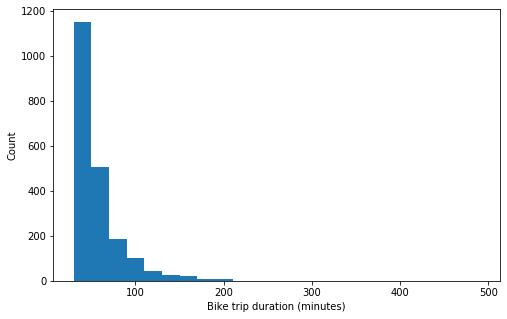

In [21]:
binsize = 20
bins = np.arange(30, bike_clean.duration_min.max() + binsize, binsize)

histogram(bike_clean.duration_min, bins, 'Bike trip duration (minutes)', 'Count')

From the histogram we can see that the graph is highly right skewed, so let's look at outliers and assess whether it should be removed from the cleaned dataset.

In [22]:
# Select 'duration_min' outliers:
Q1 = bike_clean.duration_min.quantile(0.25)
Q3 = bike_clean.duration_min.quantile(0.75)
IQR = Q3 - Q1
duration_min_outliers = bike_clean[(bike_clean.duration_min < (Q1 - (1.5 * IQR))) | (bike_clean.duration_min > (Q3 + (1.5 * IQR)))]
duration_min_outliers

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_hour,period_day
63542,2020-03-31 15:23:58,2020-03-31 15:53:30,Willow St at Blewett Ave,37.309014,-121.900011,Willow St at Blewett Ave,37.309014,-121.900011,480691,subscriber,app,29.53,15,afternoon
64695,2020-03-27 23:11:02,2020-03-27 23:52:22,3rd St at Keyes St,37.320866,-121.876279,Santa Clara St at Almaden Blvd,37.333988,-121.894902,657484,subscriber,app,41.32,23,night
64740,2020-03-01 09:55:57,2020-03-01 10:41:36,Auzerais Ave at Lincoln Ave,37.320969,-121.908296,San Carlos St at Meridian Ave,37.323345,-121.913497,693037,customer,app,45.65,9,morning
66754,2020-03-26 18:34:35,2020-03-26 19:23:54,Almaden Blvd at Balbach St,37.326730,-121.889273,Almaden Blvd at Balbach St,37.326730,-121.889273,258868,subscriber,app,49.32,18,night
66755,2020-03-26 18:41:01,2020-03-26 19:24:01,Almaden Blvd at Balbach St,37.326730,-121.889273,Almaden Blvd at Balbach St,37.326730,-121.889273,556134,subscriber,app,42.98,18,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174640,2020-03-28 15:49:53,2020-03-28 16:35:22,The Embarcadero at Sansome St,37.804770,-122.403234,The Embarcadero at Sansome St,37.804770,-122.403234,278419,subscriber,app,45.47,15,afternoon
174670,2020-03-28 15:56:20,2020-03-28 16:37:55,The Embarcadero at Sansome St,37.804770,-122.403234,The Embarcadero at Sansome St,37.804770,-122.403234,387310,customer,app,41.58,15,afternoon
174689,2020-03-20 09:45:14,2020-03-20 10:34:17,The Embarcadero at Sansome St,37.804770,-122.403234,The Embarcadero at Sansome St,37.804770,-122.403234,758208,subscriber,app,49.03,9,morning
174695,2020-03-21 18:54:19,2020-03-21 19:42:26,The Embarcadero at Sansome St,37.804770,-122.403234,The Embarcadero at Sansome St,37.804770,-122.403234,349088,customer,app,48.10,18,night


In [23]:
duration_min_outliers.duration_min.describe()

count    2224.000000
mean       53.485018
std        29.021696
min        28.850000
25%        34.230000
50%        44.800000
75%        61.235000
max       470.830000
Name: duration_min, dtype: float64

There are 2,224 rows that are outliers in duration_min variable. Typical duration among outliers are 53.48 minutes per ride. I think that in this case outliers should still be kept as some bike users may ride and park the bike somewhere other than bike's end station to run some errands before returning the bike to the nearest bike station.

#### Let's plot bike trip's duration minutes without its outliers to see its distribution:

In [24]:
dur_min_noout = bike_clean[~bike_clean.duration_min.isin(duration_min_outliers.duration_min)]
dur_min_noout

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_hour,period_day
63543,2020-03-26 16:24:05,2020-03-26 16:36:23,Willow St at Blewett Ave,37.309014,-121.900011,San Jose City Hall,37.337391,-121.886995,237580,subscriber,app,12.28,16,afternoon
63545,2020-03-15 18:51:36,2020-03-15 18:55:50,Willow St at Blewett Ave,37.309014,-121.900011,Delmas Ave at Virginia St,37.319757,-121.892999,239732,subscriber,app,4.22,18,night
63550,2020-03-31 15:20:10,2020-03-31 15:23:00,Willow St at Blewett Ave,37.309014,-121.900011,Willow St at Blewett Ave,37.309014,-121.900011,439978,subscriber,app,2.82,15,afternoon
63552,2020-03-07 18:31:26,2020-03-07 18:41:50,Willow St at Blewett Ave,37.309014,-121.900011,Parkmoor Ave at Race St,37.316736,-121.910005,168502,subscriber,app,10.38,18,night
63713,2020-03-02 20:51:31,2020-03-02 20:56:44,Bird Ave at Willow St,37.311284,-121.896325,Willow St at Vine St,37.318450,-121.883172,906196,subscriber,app,5.22,20,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174725,2020-03-15 16:47:10,2020-03-15 16:53:57,The Embarcadero at Sansome St,37.804770,-122.403234,Davis St at Jackson St,37.797280,-122.398436,181768,subscriber,clipper,6.77,16,afternoon
174726,2020-03-11 16:49:16,2020-03-11 16:54:00,The Embarcadero at Sansome St,37.804770,-122.403234,Powell St at Columbus Ave,37.800496,-122.410887,456827,subscriber,app,4.73,16,afternoon
174727,2020-03-06 13:30:22,2020-03-06 13:36:51,The Embarcadero at Sansome St,37.804770,-122.403234,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,921888,subscriber,app,6.48,13,afternoon
174728,2020-03-03 10:13:41,2020-03-03 10:17:49,The Embarcadero at Sansome St,37.804770,-122.403234,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,924766,subscriber,app,4.13,10,morning


In [25]:
dur_min_noout.duration_min.describe()

count    28138.000000
mean        10.623710
std          5.723941
min          1.000000
25%          6.280000
50%          9.520000
75%         13.927500
max         28.830000
Name: duration_min, dtype: float64

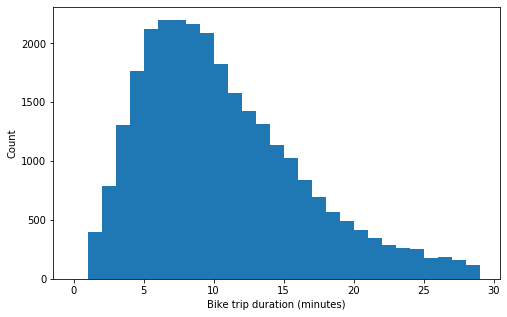

In [26]:
binsize = 1
bins = np.arange(0, dur_min_noout.duration_min.max() + binsize, binsize)

histogram(dur_min_noout.duration_min, bins, 'Bike trip duration (minutes)', 'Count')

From the graph, we can see that the distribution is still right skewed eventhough 2,224 outliers have been removed. The highest bike rent duration is between 5 to 10 minutes.

<b>2. Construct 'user_type' bar chart:</b>

In [27]:
user_count = bike_clean.user_type.value_counts()
user_count

subscriber    27436
customer       2926
Name: user_type, dtype: int64

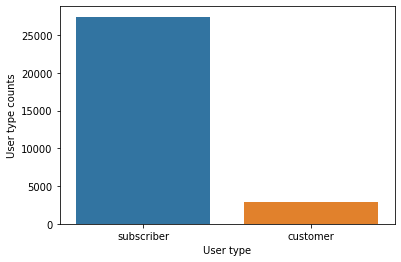

In [28]:
barchart(bike_clean.user_type, 'User type', 'User type counts')

Major users are already Lyft subscribers which accounts for 90.36% of total bike sharing users in cleaned dataset.

<b>3. Construct 'rental_access_method' bar chart:</b>

In [29]:
rental_count = bike_clean.rental_access_method.value_counts()
rental_count

app        28847
clipper     1515
Name: rental_access_method, dtype: int64

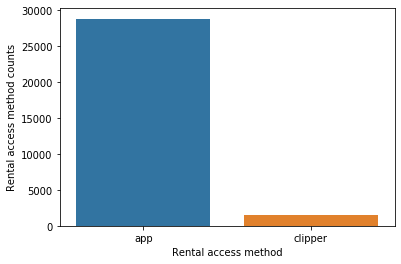

In [30]:
barchart(bike_clean.rental_access_method,'Rental access method', 'Rental access method counts')

In cleaned dataset 95% of users access Lyft via application while only 5% use clipper card to unlock the bike.

<b>4. Find bike users (each from Lyft subscriber and normal customer) that rent the bike longest (in minutes):</b>

In [31]:
bike_clean.groupby('user_type').duration_min.max()

user_type
subscriber    206.93
customer      470.83
Name: duration_min, dtype: float64

Surprisingly, it is normal customer that rent the bike longest which took 470.83 (7.85 hours) before he/she returned the bike to the station.

<b>5. Find most visited start and end station name(s):</b>

In [32]:
bike_clean.start_station_name.value_counts().nlargest(1)

San Francisco Caltrain (Townsend St at 4th St)    651
Name: start_station_name, dtype: int64

In [33]:
bike_clean.end_station_name.value_counts().nlargest(1)

San Francisco Caltrain (Townsend St at 4th St)    826
Name: end_station_name, dtype: int64

Both most visited start and end station name is San Francisco Caltrain (Townsend St at 4th St).

#### 6. Construct 'start_period' bar chart:

In [34]:
period_count = bike_clean.period_day.value_counts()
period_count

afternoon    13042
morning      10223
night         7097
Name: period_day, dtype: int64

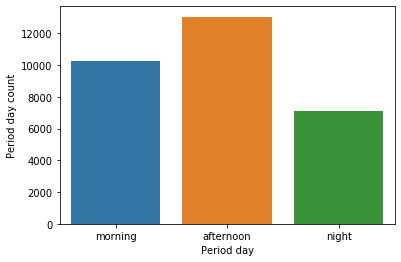

In [35]:
barchart(bike_clean.period_day,'Period day', 'Period day count')

Contrary to above hypothesis, most bike users rented the bike in the afternoon.

In [36]:
start_hr_count = bike_clean.start_hour.value_counts()
start_hr_count

17    3651
8     2915
18    2838
16    2593
9     2034
15    1922
19    1794
14    1690
12    1599
13    1587
7     1576
11    1313
10    1191
20    1029
21     706
6      550
22     469
23     261
5      203
0      200
1       86
4       55
2       52
3       48
Name: start_hour, dtype: int64

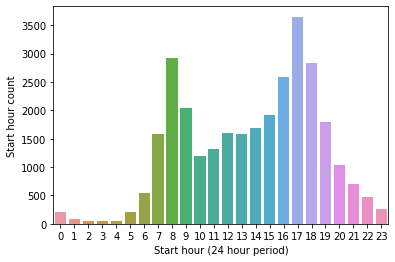

In [37]:
barchart(bike_clean.start_hour,'Start hour (24 hour period)', 'Start hour count')

Looking at the time that most rental usage occurred. Bike users usually rented the bike in rush hour period as top 5 bike rent start time is in the late afternoon (4-5 p.m.), morning (8-9 a.m.) and evening (6 p.m.).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For duration_min, though there are 2,224 outliers in cleaned dataset both before removing outliers and after removing outliers have right skewed distribution. I decided not to perform any transformations as I think it is normal to have unusual ride duration as some customers might have to run some errands before returning the bike to the nearest bike station.

> After performing some EDAs, most customers are Lyft subscribers and mainly access bike sharing system via application. The prior hypothesis that subscribers tend to rent bike longer is contrary to findings that the highest bike duration in minutes (470.83 minutes) is made from normal customers.

> The most visited start and end station name is the same which is San Francisco Caltrain (Townsend St at 4th St) which is near SF Oakland Bay Bridge, not Golden Gat Bridge. Afternoon is the highest time period that bike users rented a bike.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of interested feature is not unexpected while feature engineering (add 'duration_min', 'start_hour' and 'period_day' columns in cleaned dataset) is done in preliminary wrangling stage for further explorations.

#### Note: For latitudes and longitude, the author thinks that it is best to explore relationships in scatterplot, which will be introduced in the next section.

## Bivariate Exploration

<b>1. Let's look at the pairwise correlations between features in the cleaned dataset</b>

In [38]:
bike_clean.head(3)

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_hour,period_day
63542,2020-03-31 15:23:58,2020-03-31 15:53:30,Willow St at Blewett Ave,37.309014,-121.900011,Willow St at Blewett Ave,37.309014,-121.900011,480691,subscriber,app,29.53,15,afternoon
63543,2020-03-26 16:24:05,2020-03-26 16:36:23,Willow St at Blewett Ave,37.309014,-121.900011,San Jose City Hall,37.337391,-121.886995,237580,subscriber,app,12.28,16,afternoon
63545,2020-03-15 18:51:36,2020-03-15 18:55:50,Willow St at Blewett Ave,37.309014,-121.900011,Delmas Ave at Virginia St,37.319757,-121.892999,239732,subscriber,app,4.22,18,night


In [39]:
# Categorize variables into numeric and categorical:
numeric_var = ['duration_min', 'start_hour', 'start_station_latitude', 
                'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
categorical_var = ['user_type', 'rental_access_method', 'period_day']

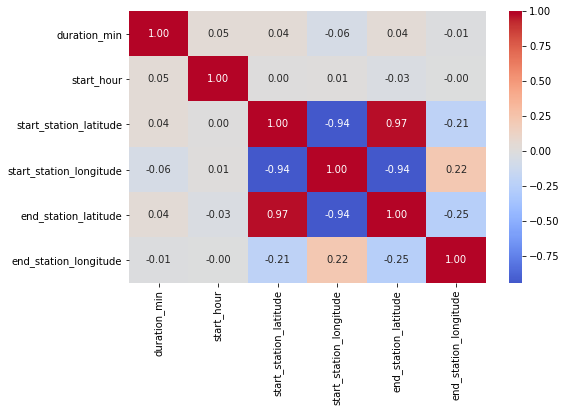

In [40]:
# Plot correlation plot:
plt.figure(figsize = [8, 5])
sns.heatmap(bike_clean[numeric_var].corr(), annot = True, fmt = '.2f',
           cmap = 'coolwarm', center = 0)
plt.show();

Both latitudes and longitudes of start and end station is negatively correlated (Dark blue color). This makes sense as both start and end latitude is positive numbers while it is opposite for longitude numbers.

<b>2. Scatterplot of latitudes and longitudes</b>

##### Build scatterplot function to reduce code repetition:

In [41]:
def scatterplot(x_input, y_input, xtick, ytick, xlab, ylab):
    plt.figure(figsize=[6,4])
    plt.scatter(data = bike_clean, x = x_input, y = y_input, alpha = 0.5/10)
    plt.xticks(xtick, rotation = 45)
    plt.yticks(ytick)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show();

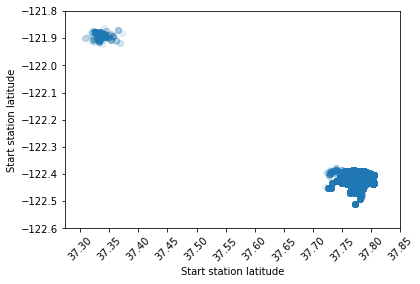

In [42]:
# Start station latitude and longtitude scatterplot:
x_range = np.arange(37.3, 37.85, 0.05)
y_range = np.arange(-122.6, -121.7, 0.1)

scatterplot('start_station_latitude', 'start_station_longitude', x_range, y_range, 'Start station latitude', 'Start station latitude')

From scatterplot, there are 2 main clusters for start latitudes and longitudes. The first cluster have latitude values between 37.3 to 37.4 and longitude values between -121.95 to -121.85. The second cluster have higher latitude values: 37.75 to almost 37.81 but lower longitude: -122.55 to -122.35.

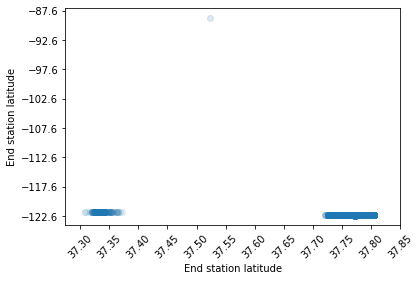

In [43]:
# End station latitude and longtitude scatterplot:
x_range = np.arange(37.3, 37.85, 0.05)
y_range = np.arange(-122.6, -87, 5)

scatterplot('end_station_latitude', 'end_station_longitude', x_range, y_range, 'End station latitude', 'End station latitude')

Like start latitudes and longitudes, there are 2 main clusters for end latitudes and longitudes as well. However there is 1 outlier that has longitude much higher than the 2 clusters. This station is '16th Depot Bike Fleet Station' that the author has imputed the missing latitude and longitude numbers from the internet.

> The reason that there are clusters in both scatterplots is because latitude and longitude numbers differ in very small decimal units as the area of interest is only in SF. Therefore it is normal to have dense cluster volumes on both graphs.

<b>3. Relationship between 2 categorical variables: user_type and rental_access_method</b>

In [44]:
bike_clean.groupby('user_type').rental_access_method.value_counts()

user_type   rental_access_method
subscriber  app                     25971
            clipper                  1465
customer    app                      2876
            clipper                    50
Name: rental_access_method, dtype: int64

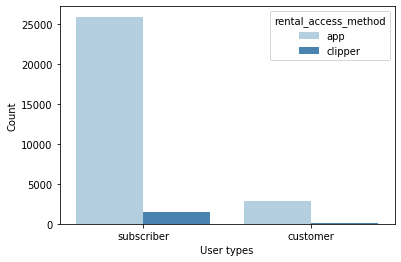

In [45]:
# user_type vs. rental_access_method:
plt.figure(figsize = [6, 4])

sns.countplot(data = bike_clean, x = 'user_type', hue = 'rental_access_method', palette = 'Blues')
plt.xlabel('User types')
plt.ylabel('Count');

From bar graph and groupby summary, the majority of bike users - subscribers access bike service via app which is in the same fashion with normal customer. Clipper seems to be not as popular as Lyft application. 

<b>4. Subscriber and customer value counts</b>

In [46]:
# Subset bike_clean dataframe into 2 user types: subscribers and customers
sub_user = bike_clean[bike_clean.user_type == 'subscriber']
cus_user = bike_clean[bike_clean.user_type == 'customer']

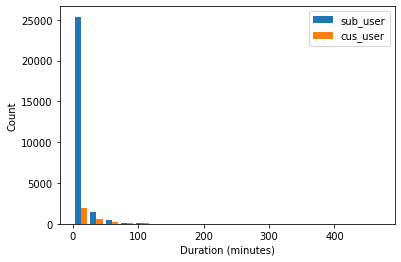

In [47]:
# Plot histogram of 2 user types in 1 graph:
plt.hist([sub_user.duration_min, cus_user.duration_min], bins = 20, label=['sub_user', 'cus_user'])
plt.legend(loc ='upper right')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show();

Both Lyft subscribers and normal customer bar graphs show that the majority of users rent and return the bike within 20-40 minutes. Only a few rent the bike for long time period (more than 1 hour).

<b>5. Horizontal strip plot of start period and duration in minutes:</b>

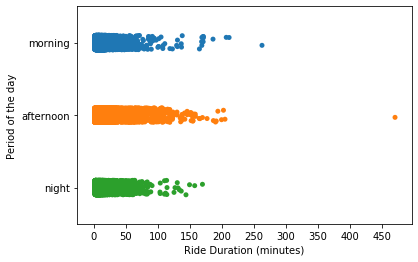

In [53]:
sns.stripplot(x = 'duration_min', y = 'period_day', data = bike_clean)
plt.xticks(np.arange(0, 500, 50))
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Period of the day');

Unsurprisingly, though there is an outlier afternoon is the period that has the longest duration per ride (in minutes) and period with highest number of bike rents. This supports prior findings in univariate exploration that most bike users rented the bike in the afternoon. Therefore it is possible to find higher number of bike rents with long duration in that period of time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Looking at correlation matrix, new findings supports my intuition that 'duration_min' has weak correlation with other numeric variables. This makes sense as bike rent duration is irrelevant to bike rent's start time and geolocation (i.e. latitudes and longitudes). Also in pairred histograms, most bike rent durations take less than 1 hour which supports prior findings in univariate exploration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Identical to my intuition, latitudes and longtitudes of start and end station are negatively correlated as the number signs of these two variables are opposite to each other (positive and negative numeric signs).

## Multivariate Exploration

> I will mainly explore relationships between duration (minutes) and other 3 categorical variables: 'user_types', 'rental_access_method' and 'period_day' more.

<b>1. Relationships between 2 categorical variables: 'user_type' and 'rental_access_method' and 1 numeric variable: 'duration_min'</b>

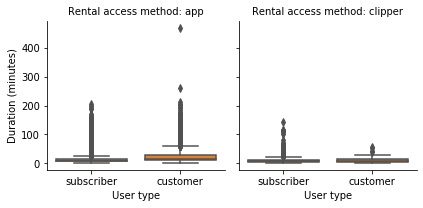

In [49]:
base_color = sns.color_palette()[1]

g = sns.FacetGrid(data = bike_clean, col = 'rental_access_method')
g.map(sns.boxplot, 'user_type', 'duration_min', color = base_color)
g.set_axis_labels('User type', 'Duration (minutes)')
g.set_titles('Rental access method: {col_name}');

From above visualization, normal customer that access Lyft bike rent service via application has the highest IQR range while other 3 groups has approximately the same IQR range. Customer who rent the bike longest (470.83 minutes: highest outlier value in bike_clean) is also the one that access Lyft bike rent service via application.

<b>2. Relationships between 3 categorical variables: 'user_type', 'rental_access_method' and 'start_hour'</b>

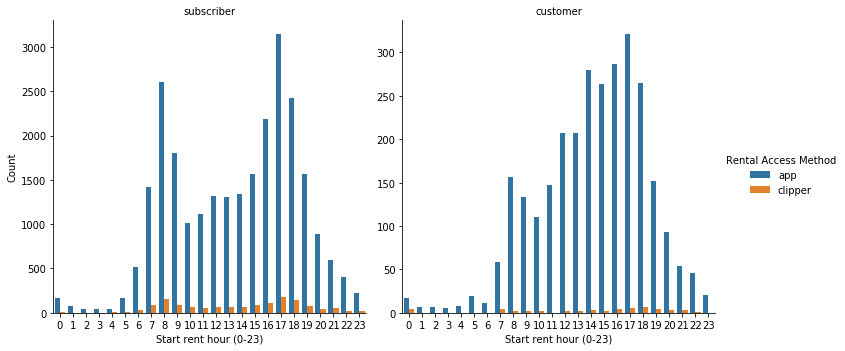

In [50]:
p = sns.catplot(data = bike_clean, x = 'start_hour', col = "user_type", hue = "rental_access_method", kind = 'count', sharey = False)
p.set_axis_labels("Start rent hour (0-23)", "Count")
p._legend.set_title('Rental Access Method')
p.set_titles("{col_name}");

We can see much clearer trend on users who access the service via application since there is much more users access Lyft via an application than clipper. The findings are consistent with prior findings that the time that users who uses application rent the bike most is on 5 p.m. (color: blue) regardless whether they are Lyft subscribers or normal users. Unlike users who access the services via application, there is quite unclear trend to clipper users (color: orange) as the graphs for both user types ado not show any peak area.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For this section, the findings on the plotted graph support my findings in the previous section more. The findings that normal customers rent the bike longer compared to subscribers though there is more number of subscribers and he time that users who uses application rent the bike most is on 5 p.m. regardless of user types are also found on this section.

### Were there any interesting or surprising interactions between features?

> There is no new surprising interactions as the vairables that I am interested in is numeric and categorical in this case.